In [ ]:
import random
import pandas as pd
import numpy as np
#!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

Function to create embeddings

In [ ]:
def getTokens(input):
  tokensBySlash = str(input.encode('utf-8')).split('/')	#get tokens after splitting by slash
  allTokens = []
  for i in tokensBySlash:
    tokens = str(i).split('-')	#get tokens after splitting by dash
    tokensByDot = []
    for j in range(0,len(tokens)):
      tempTokens = str(tokens[j]).split('.')	#get tokens after splitting by dot
      tokensByDot = tokensByDot + tempTokens
    allTokens = allTokens + tokens + tokensByDot
  allTokens = list(set(allTokens))	#remove redundant tokens
  if 'com' in allTokens:
    allTokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
  return allTokens

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Create embedding from data

In [ ]:
allurls = 'shortester_data.txt'	#path to our all urls file
allurlscsv = pd.read_csv(allurls)	#reading file
allurlsdata = pd.DataFrame(allurlscsv)	#converting to a dataframe

allurlsdata = np.array(allurlsdata)	#converting it into an array
random.shuffle(allurlsdata)	#shuffling
print(allurlsdata)

[['zkic.com' 'bad']
 ['nowina.info' 'bad']
 ['zkic.com' 'bad']
 ...
 ['nacom.co.uk/wishes/Gdoc/' 'bad']
 ['erlas.com.tr/wp-admin/user/GgG/google/' 'bad']
 ['web.artprice.com/artistdetails.aspx?idarti=NTY0MzY2NzY5Nzk4MjkxMS0=&artist=Ross+R.+GILL'
  'good']]


In [ ]:
y = [d[1] for d in allurlsdata]	#all labels
corpus = [d[0] for d in allurlsdata]	#all urls corresponding to a label (either good or bad)
vectorizer = TfidfVectorizer(tokenizer=getTokens)	#get a vector for each url but use our customized tokenizer
X = vectorizer.fit_transform(corpus) #get the X vector

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

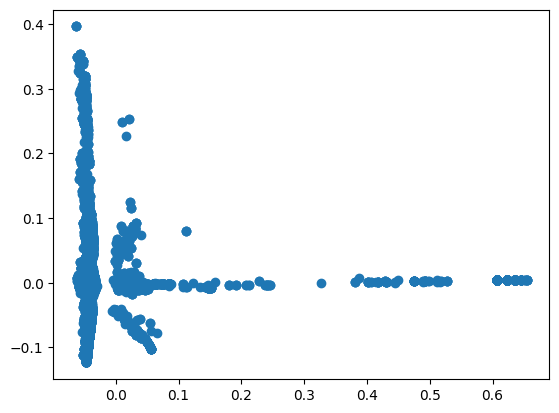

In [ ]:
# I can't figure out how to do color
vectors = X.toarray()

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
plt.show

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)	#split into training and testing set 80/20 ratio

# lgs = LogisticRegression()	#using logistic regression
# lgs.fit(X_train, y_train)
# print(lgs.score(X_test, y_test)) #print the score. It comes out to be 98%

In [ ]:
# X_predict = ['wikipedia.com','google.com/search=faizanahad','pakistanifacebookforever.com/getpassword.php/','www.radsport-voggel.de/wp-admin/includes/log.exe','ahrenhei.without-transfer.ru/nethost.exe','www.itidea.it/centroesteticosothys/img/_notes/gum.exe']
# X_predict = vectorizer.transform(X_predict)
# y_Predict = lgs.predict(X_predict)
# print(y_Predict) #printing predicted values

['bad' 'bad' 'good' 'bad' 'bad' 'bad']
['bad' 'bad' 'good' 'bad' 'bad' 'bad']


In [ ]:
# KNN implementation
knn = KNeighborsClassifier(n_neighbors=3)

value_mapping = {'bad': 0, 'good' : 1}

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

y_pred_str = np.array([value_mapping[y] for y in y_pred])
y_test_str = np.array([value_mapping[y] for y in y_test])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='good')
recall = recall_score(y_test, y_pred, pos_label='good')
f1 = f1_score(y_test, y_pred, pos_label='good')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.9164075993091537
Precision: 0.9609455292908531
Recall: 0.8208955223880597
F1 score: 0.8854166666666667


In [ ]:
# SVM implementation
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

y_svm_pred_str = np.array([value_mapping[y] for y in y_pred])
y_svm_test_str = np.array([value_mapping[y] for y in y_test])

accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat, pos_label='good')
recall = recall_score(y_test, yhat, pos_label='good')
f1 = f1_score(y_test, yhat, pos_label='good')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9813471502590674
Precision: 0.9656652360515021
Recall: 0.9877085162423178
F1 score: 0.9765625
